In [3]:
#Импортируем необходимые нам библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Указываем путь для чтения файла
path = ("../csv/methane.csv")
#Считываем файл
methane = pd.read_csv(path)
#Отображаем информацию об общем количестве наблюдений
print("Общее количество наблюдений:")
display(methane.shape[0])

Общее количество наблюдений:


1548

In [4]:
#Выявление 10 стран с максимальными выбросами метана
top_10_countries_max = methane.sort_values("emissions", ascending=False).head(10)
print("Страны с максимальными выбросами метана:")
print(top_10_countries_max["country"])

#Определение континентов для стран с максимальными выбросами
continents_max = top_10_countries_max["region"].unique()
print("\nКонтиненты, на которых происходят максимальные выбросы:")
print(continents_max)

#Выявление 10 стран с минимальными выбросами метана
top_10_countries_min = methane.sort_values("emissions").head(10)
print("\nСтраны с минимальными выбросами метана:")
print(top_10_countries_min["country"])

#Определение континентов для стран с минимальными выбросами
continents_min = top_10_countries_min["region"].unique()
print("\nКонтиненты, на которых происходят минимальные выбросы:")
print(continents_min)

Страны с максимальными выбросами метана:
1526            World
1545            World
1547            World
1544            World
1540            World
478             China
460             China
481             India
1489           Russia
1406    United States
Name: country, dtype: object

Континенты, на которых происходят максимальные выбросы:
['World' 'Asia Pacific' 'Russia & Caspian' 'North America']

Страны с минимальными выбросами метана:
1416          Other
978     Netherlands
973     Netherlands
246         Morocco
1417          Other
974     Netherlands
1106       Slovenia
979     Netherlands
264      Mozambique
283           Niger
Name: country, dtype: object

Континенты, на которых происходят минимальные выбросы:
['Other' 'Europe' 'Africa']


In [5]:
#Определение наиболее часто встречающихся причин выбросов
top_reasons = methane["reason"].value_counts().head()
print("Наиболее часто встречающиеся причины выбросов:")
print(top_reasons)

Наиболее часто встречающиеся причины выбросов:
All         746
Fugitive    342
Vented      342
Flared      118
Name: reason, dtype: int64


In [6]:
#Группировка результатов по временным показателям для пункта 1
grouped_max = top_10_countries_max.groupby("baseYear")["emissions"].sum()
print("Группировка результатов по временным показателям для пункта 1:")
print(grouped_max)

#Группировка результатов по временным показателям для пункта 2
grouped_min = top_10_countries_min.groupby("baseYear")["emissions"].sum()
print("\nГруппировка результатов по временным показателям для пункта 2:")
print(grouped_min)

Группировка результатов по временным показателям для пункта 1:
baseYear
2019-2021    249572.908203
2022         249808.921875
Name: emissions, dtype: float64

Группировка результатов по временным показателям для пункта 2:
baseYear
2022    0.024037
Name: emissions, dtype: float64


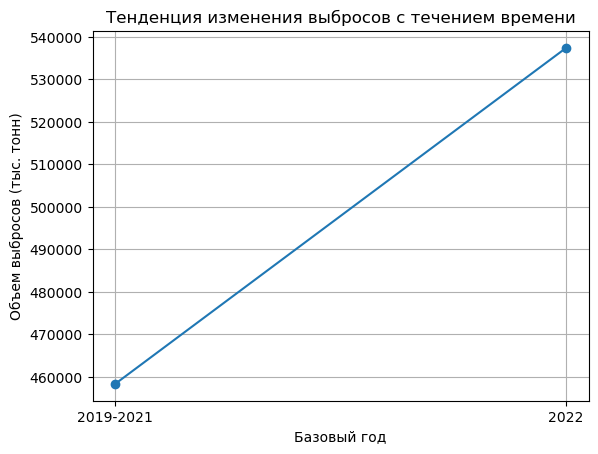

In [7]:
#Группировка результатов по временным показателям
grouped = methane.groupby("baseYear")["emissions"].sum()

#Построение графика
plt.plot(grouped.index, grouped.values, marker='o')
plt.xlabel("Базовый год")
plt.ylabel("Объем выбросов (тыс. тонн)")
plt.title("Тенденция изменения выбросов с течением времени")
plt.grid(True)
plt.show()

In [8]:
#Определение наиболее и наименее часто встречающихся секторов
top_sectors = methane["type"].value_counts().head(1)
bottom_sectors = methane["type"].value_counts().tail(1)
print("Наиболее часто встречающийся сектор:")
print(top_sectors)
print("\nНаименее часто встречающийся сектор:")
print(bottom_sectors)

#Группировка данных по секторам и суммирование объемов выбросов
grouped_sectors = methane.groupby("type")["emissions"].sum()
print("\nОбъем выбросов по секторам:")
print(grouped_sectors)

Наиболее часто встречающийся сектор:
Energy    1233
Name: type, dtype: int64

Наименее часто встречающийся сектор:
Waste    105
Name: type, dtype: int64

Объем выбросов по секторам:
type
Agriculture    292758.868769
Energy         537396.311526
Other           19766.646886
Waste          145838.417946
Name: emissions, dtype: float64


In [9]:
#Создание сводной таблицы для суммарных выбросов и количества случаев выбросов по регионам
pivot_table = pd.pivot_table(methane, values='emissions', index='region', aggfunc=['sum', 'count'])
pivot_table.columns = ['Объем выбросов', 'Количество случаев выбросов']
pivot_table = pivot_table.sort_values('Объем выбросов', ascending=False)

#Вывод сводной таблицы
print("Зависимость объемов выбросов от их частоты по регионам:")
print(pivot_table)

Зависимость объемов выбросов от их частоты по регионам:
                           Объем выбросов  Количество случаев выбросов
region                                                                
World                       489152.316956                           22
Asia Pacific                177699.611465                          270
North America                63347.409177                           61
Russia & Caspian             62421.612360                           96
Africa                       54197.152613                          406
Europe                       49208.996818                          302
Central and South America    45639.989799                          183
Middle East                  38095.798763                          187
Other                        15997.357175                           21


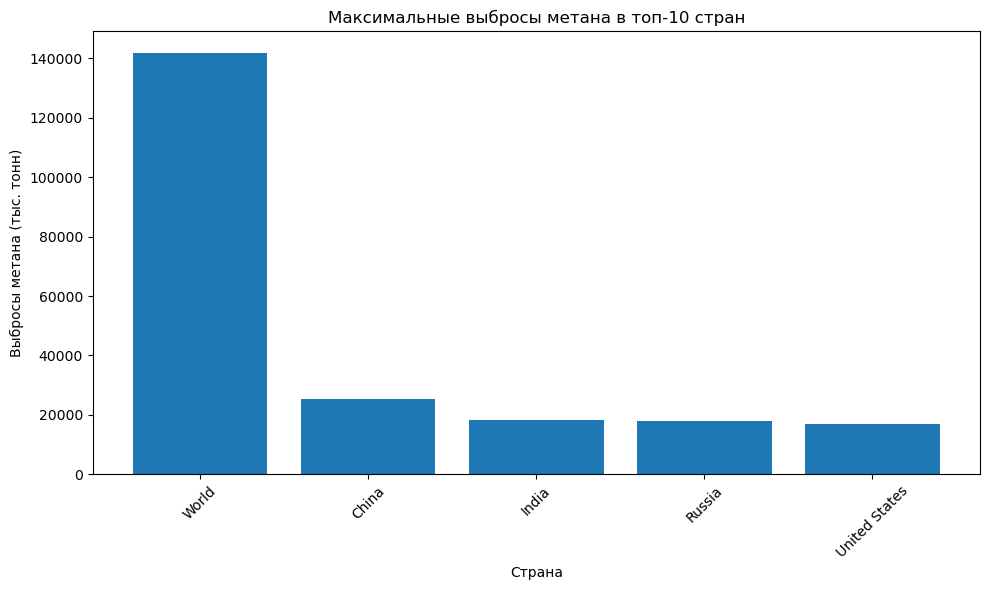

In [10]:
#График 10 стран с максимальными выбросами метана
plt.figure(figsize=(10, 6))
plt.bar(top_10_countries_max["country"], top_10_countries_max["emissions"])
plt.xlabel("Страна")
plt.ylabel("Выбросы метана (тыс. тонн)")
plt.title("Максимальные выбросы метана в топ-10 стран")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

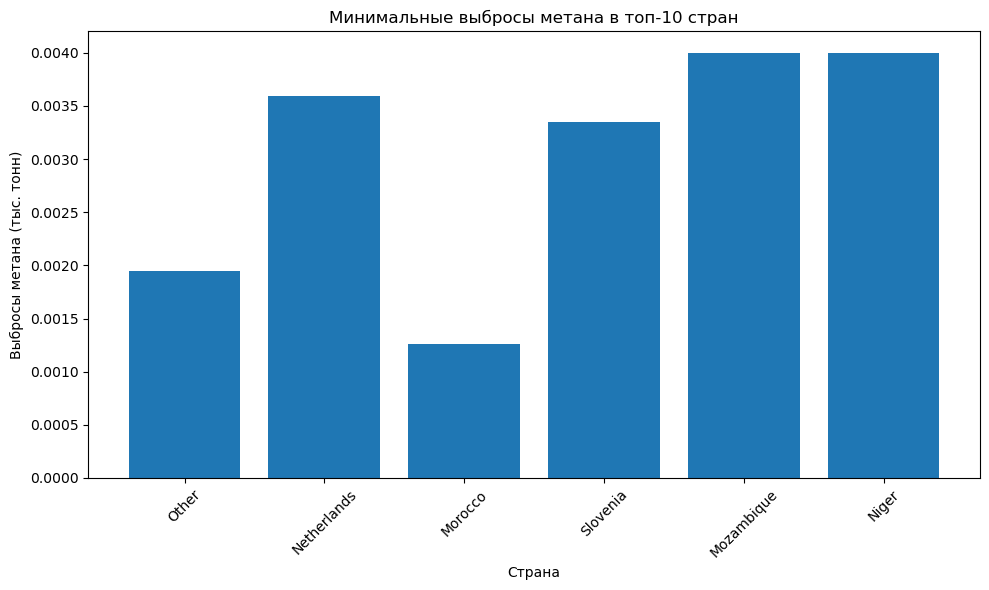

In [11]:
#График 10 стран с минимальными выбросами метана
#Сортировка данных о минимальных выбросах в топ-10 стран по возрастанию
top_10_countries_min_sorted = top_10_countries_min.sort_values("emissions")
plt.figure(figsize=(10, 6))
plt.bar(top_10_countries_min["country"], top_10_countries_min["emissions"])
plt.xlabel("Страна")
plt.ylabel("Выбросы метана (тыс. тонн)")
plt.title("Минимальные выбросы метана в топ-10 стран")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

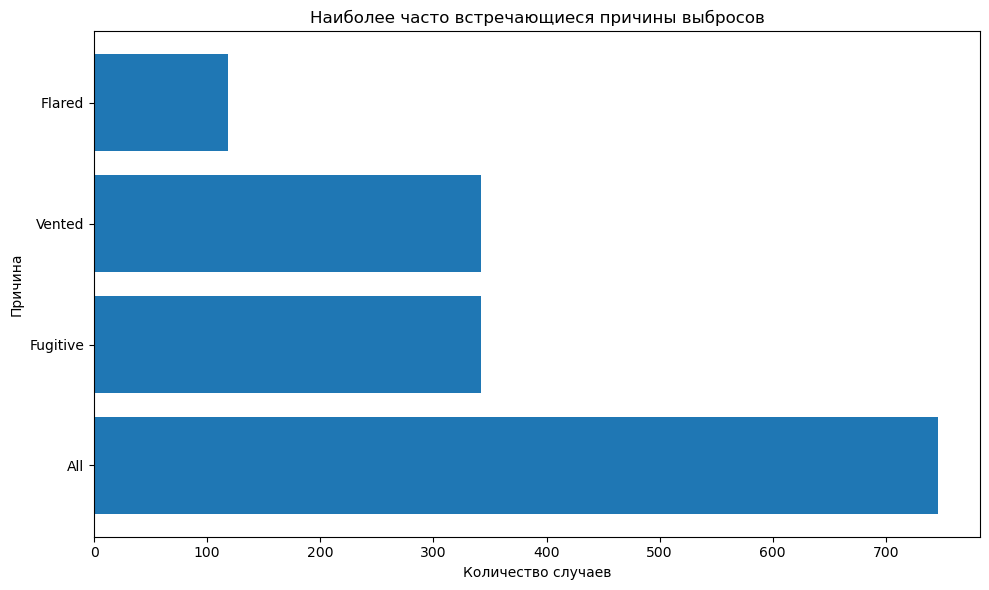

In [12]:
#График наиболее часто встречающихся причин выбросов
plt.figure(figsize=(10, 6))
plt.barh(top_reasons.index, top_reasons.values)
plt.xlabel("Количество случаев")
plt.ylabel("Причина")
plt.title("Наиболее часто встречающиеся причины выбросов")
plt.tight_layout()
plt.show()

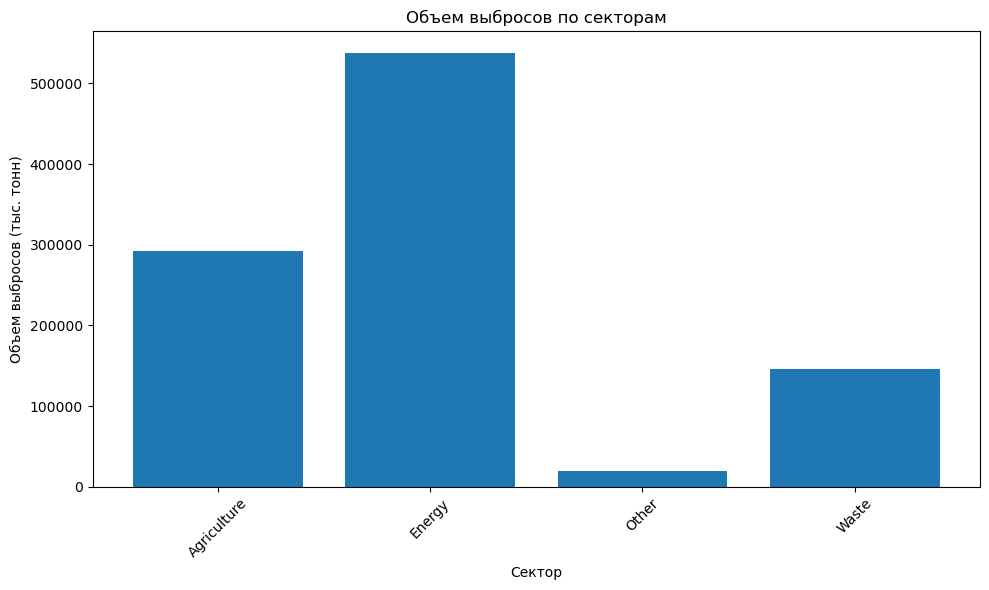

In [13]:
#График объемов выбросов по секторам
plt.figure(figsize=(10, 6))
plt.bar(grouped_sectors.index, grouped_sectors.values)
plt.xlabel("Сектор")
plt.ylabel("Объем выбросов (тыс. тонн)")
plt.title("Объем выбросов по секторам")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

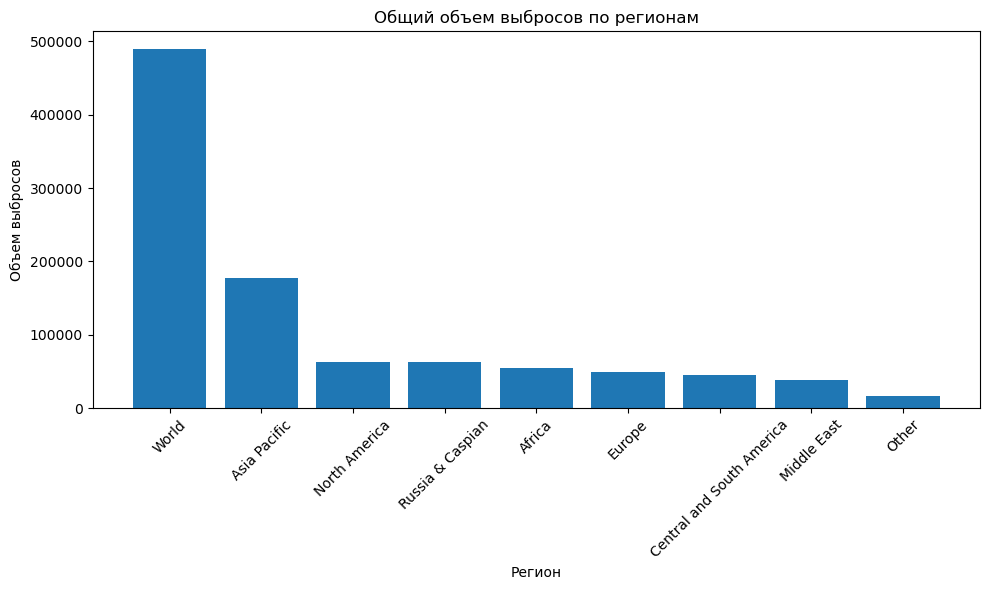

In [14]:
#График общего объема выбросов по регионам
plt.figure(figsize=(10, 6))
plt.bar(pivot_table.index, pivot_table["Объем выбросов"])
plt.xlabel("Регион")
plt.ylabel("Объем выбросов")
plt.title("Общий объем выбросов по регионам")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()